# Credit Card Fraud Detection using CNN

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import  Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPool1D
from tensorflow.keras.optimizers import Adam

In [2]:
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
data.shape

(284807, 31)

In [6]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

## Balencing dataset

In [9]:
non_fraud = data[data['Class']==0]
fraud = data[data['Class']==1]

In [10]:
non_fraud.shape , fraud.shape

((284315, 31), (492, 31))

In [11]:
non_fraud =non_fraud.sample(fraud.shape[0])
non_fraud.shape

(492, 31)

In [12]:
data = fraud.append(non_fraud, ignore_index=True)
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
1,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
2,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
3,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
4,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,86286.0,1.257161,0.541021,-0.701913,0.686929,0.262238,-0.961329,0.248155,-0.105768,-0.286840,...,-0.133039,-0.398080,-0.127746,-0.135374,0.558947,0.374717,-0.039997,0.027655,0.76,0
980,166180.0,1.858420,-0.559354,-1.057389,0.684622,-0.134009,-0.164832,-0.018892,-0.084747,1.458027,...,-0.314440,-0.697079,0.190317,0.662488,0.012899,-0.538894,-0.003476,-0.030298,86.20,0
981,150569.0,2.049105,0.224623,-1.739363,0.554996,0.167713,-1.546958,0.284770,-0.398178,0.586926,...,0.192551,0.725432,-0.023974,-0.026268,0.250661,-0.104315,-0.001799,-0.028153,6.95,0
982,58938.0,-2.992531,1.476551,-0.593589,1.260695,-1.415792,0.611102,-0.108662,1.463782,0.007230,...,-0.120528,0.057042,0.031889,-0.315681,0.084591,-0.200994,0.384643,-0.117909,129.71,0


In [13]:
data['Class'].value_counts()

1    492
0    492
Name: Class, dtype: int64

## Train Test split

In [14]:
x= data.drop('Class', axis=1)
y=data['Class']

In [15]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2, random_state=0, stratify=y)

In [16]:
x_train.shape, x_test.shape

((787, 30), (197, 30))

In [17]:
x_train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
845,60751.0,-0.145977,1.349267,-0.374464,0.702375,0.428918,-0.482017,0.521125,0.358475,-0.886311,...,-0.044840,0.179436,0.574133,-0.033714,-0.345228,-0.631410,-0.387345,0.309871,0.150801,0.72
898,75605.0,1.118667,-0.273525,1.330562,0.805698,-1.208546,-0.113424,-0.776487,0.253934,0.782664,...,-0.143987,-0.034710,0.010236,0.052036,0.561534,0.168173,0.288835,0.007414,0.017884,11.50
45,18399.0,-14.474437,6.503185,-17.712632,11.270352,-4.150142,-3.372098,-16.535807,-1.443947,-6.815273,...,1.101250,-2.475962,0.342391,-3.564508,-0.818140,0.153408,0.755079,2.706566,-0.992916,1.00
536,73688.0,-5.180411,-5.829494,1.619778,0.331152,6.251576,-4.538414,-3.168766,0.439224,-0.270280,...,1.749028,0.548256,-0.310954,0.846751,0.095843,0.916194,1.017478,-0.322774,0.150653,50.00
739,132851.0,1.433515,-1.195777,-1.952131,0.050863,0.526313,0.839247,0.170089,0.162075,0.234211,...,0.252178,0.459564,0.879443,-0.192085,-1.555318,-0.220659,0.871760,-0.099583,-0.051365,276.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,59840.0,-3.215382,-0.364223,-1.261883,3.794949,0.711206,-1.316476,-5.165141,0.625278,-1.582301,...,0.019626,0.401341,0.152191,-0.934675,-0.256148,-0.469403,-0.282496,0.866077,-0.433466,5.91
711,36284.0,-2.668572,-0.524079,1.413419,1.129571,-0.032696,-0.660956,-0.959114,1.040304,0.558556,...,-0.350293,-0.219141,-0.795751,-0.439587,0.430095,-0.124550,-0.772694,-0.029291,-0.347567,15.74
31,12095.0,-4.727713,3.044469,-5.598354,5.928191,-2.190770,-1.529323,-4.487422,0.916392,-1.307010,...,-0.207759,0.650988,0.254983,0.628843,-0.238128,-0.671332,-0.033590,-1.331777,0.705698,30.39
882,135780.0,-0.869461,0.305664,2.176407,0.121869,0.321226,-0.095197,-0.027654,0.140390,0.036347,...,0.274097,0.274422,0.859067,-0.327249,1.156193,0.566254,0.034509,0.090399,0.096232,9.99


## Scaling the data

In [18]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [19]:
y_train =y_train.to_numpy()
y_test = y_test.to_numpy()

##  Reshaping the data

In [29]:
x_train= x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test= x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [21]:
x_train.shape, x_test.shape

((787, 30, 1), (197, 30, 1))

## Building the CNN

In [27]:
epochs=20
model= Sequential()
model.add(Conv1D(32,2,activation='relu',input_shape=x_train[0].shape))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(64,2,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 29, 32)            96        
_________________________________________________________________
batch_normalization (BatchNo (None, 29, 32)            128       
_________________________________________________________________
dropout (Dropout)            (None, 29, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 28, 64)            4160      
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 64)            256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 64)            0         
_________________________________________________________________
flatten (Flatten)            (None, 1792)              0

In [30]:
model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [31]:
history = model.fit(x_train, y_train, epochs=epochs, validation_data=(x_test, y_test), verbose=1)

Epoch 1/20
25/25 [==============================] - 0s 19ms/step - loss: 0.6694 - accuracy: 0.6874 - val_loss: 0.5856 - val_accuracy: 0.8376
Epoch 2/20
25/25 [==============================] - 0s 4ms/step - loss: 0.4426 - accuracy: 0.8297 - val_loss: 0.5365 - val_accuracy: 0.7868
Epoch 3/20
25/25 [==============================] - 0s 6ms/step - loss: 0.3535 - accuracy: 0.8628 - val_loss: 0.5039 - val_accuracy: 0.8274
Epoch 4/20
25/25 [==============================] - 0s 4ms/step - loss: 0.3375 - accuracy: 0.8767 - val_loss: 0.4738 - val_accuracy: 0.8782
Epoch 5/20
25/25 [==============================] - 0s 4ms/step - loss: 0.3090 - accuracy: 0.8983 - val_loss: 0.4402 - val_accuracy: 0.9086
Epoch 6/20
25/25 [==============================] - 0s 3ms/step - loss: 0.2594 - accuracy: 0.9060 - val_loss: 0.4032 - val_accuracy: 0.9086
Epoch 7/20
25/25 [==============================] - 0s 3ms/step - loss: 0.2523 - accuracy: 0.9009 - val_loss: 0.3748 - val_accuracy: 0.9137
Epoch 8/20
25/25 [=

## Accuray and Loss curves

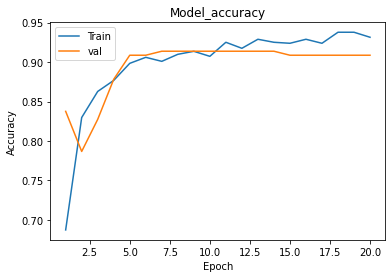

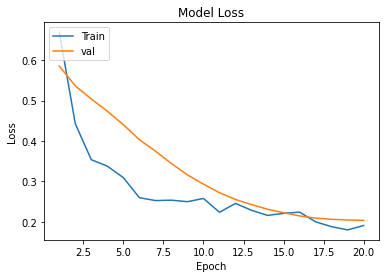

In [32]:
def plot_learningCurve(history, epoch):
    # plot training & validation accuracy values
    epoch_range = range(1, epoch+1)
    plt.plot(epoch_range, history.history['accuracy'])
    plt.plot(epoch_range, history.history['val_accuracy'])
    plt.title('Model_accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train','val'],loc='upper left')
    plt.show()
    
    # Plot traning & validation loss values
    plt.plot(epoch_range, history.history['loss'])
    plt.plot(epoch_range, history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train','val'],loc='upper left')
    plt.show()
plot_learningCurve(history, 20)

## Adding Maxpool

In [38]:
epochs=50
model= Sequential()
model.add(Conv1D(32,2,activation='relu',input_shape=x_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.2))

model.add(Conv1D(64,2,activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

In [39]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_4 (Conv1D)            (None, 29, 32)            96        
_________________________________________________________________
batch_normalization_4 (Batch (None, 29, 32)            128       
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 14, 32)            0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 14, 32)            0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 13, 64)            4160      
_________________________________________________________________
batch_normalization_5 (Batch (None, 13, 64)            256       
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 6, 64)            

In [40]:
model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [41]:
history = model.fit(x_train, y_train, epochs=epochs, validation_data=(x_test, y_test), verbose=1)

Epoch 1/50
25/25 [==============================] - 0s 7ms/step - loss: 1.1628 - accuracy: 0.5896 - val_loss: 0.6693 - val_accuracy: 0.5990
Epoch 2/50
25/25 [==============================] - 0s 4ms/step - loss: 0.9417 - accuracy: 0.6506 - val_loss: 0.6380 - val_accuracy: 0.6853
Epoch 3/50
25/25 [==============================] - 0s 4ms/step - loss: 0.7156 - accuracy: 0.6976 - val_loss: 0.6144 - val_accuracy: 0.6701
Epoch 4/50
25/25 [==============================] - 0s 4ms/step - loss: 0.7074 - accuracy: 0.7205 - val_loss: 0.5927 - val_accuracy: 0.6599
Epoch 5/50
25/25 [==============================] - 0s 4ms/step - loss: 0.5978 - accuracy: 0.7357 - val_loss: 0.5754 - val_accuracy: 0.6599
Epoch 6/50
25/25 [==============================] - 0s 4ms/step - loss: 0.5755 - accuracy: 0.7700 - val_loss: 0.5571 - val_accuracy: 0.6802
Epoch 7/50
25/25 [==============================] - 0s 4ms/step - loss: 0.4978 - accuracy: 0.8005 - val_loss: 0.5397 - val_accuracy: 0.6853
Epoch 8/50
25/25 [==

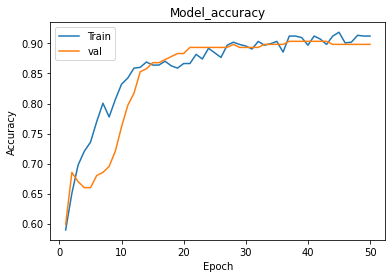

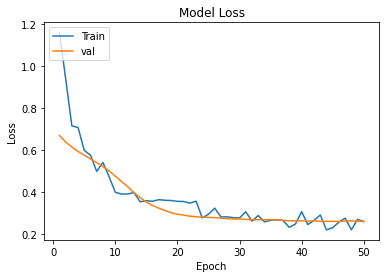

In [42]:
def plot_learningCurve(history, epoch):
    # plot training & validation accuracy values
    epoch_range = range(1, epoch+1)
    plt.plot(epoch_range, history.history['accuracy'])
    plt.plot(epoch_range, history.history['val_accuracy'])
    plt.title('Model_accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train','val'],loc='upper left')
    plt.show()
    
    # Plot traning & validation loss values
    plt.plot(epoch_range, history.history['loss'])
    plt.plot(epoch_range, history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train','val'],loc='upper left')
    plt.show()
plot_learningCurve(history, 50)

## ANN MODEL 

Accurracy= 93%

In [32]:
x_train= x_train.reshape(x_train.shape[0],x_train.shape[1])
x_test= x_test.reshape(x_test.shape[0],x_test.shape[1])

In [75]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units =15 , kernel_initializer = 'uniform', activation = 'relu', input_dim =30))

# Adding the second hidden layer
classifier.add(Dense(units = 15, kernel_initializer = 'uniform', activation = 'relu'))

classifier.add(Dense(units = 30, kernel_initializer = 'uniform', activation = 'relu'))

classifier.add(Dense(units = 30, kernel_initializer = 'uniform', activation = 'relu'))

#classifier.add(Dense(units = 15, kernel_initializer = 'uniform', activation = 'relu'))


# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
history=classifier.fit(x_train, y_train, batch_size = 32, epochs = 200,validation_data=(x_test, y_test), verbose=1)

Epoch 1/200
25/25 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.4841 - val_loss: 0.6928 - val_accuracy: 0.4975
Epoch 2/200
25/25 [==============================] - 0s 3ms/step - loss: 0.6864 - accuracy: 0.5197 - val_loss: 0.6664 - val_accuracy: 0.8629
Epoch 3/200
25/25 [==============================] - 0s 2ms/step - loss: 0.5850 - accuracy: 0.9199 - val_loss: 0.4993 - val_accuracy: 0.9036
Epoch 4/200
25/25 [==============================] - 0s 2ms/step - loss: 0.4397 - accuracy: 0.9339 - val_loss: 0.4175 - val_accuracy: 0.9188
Epoch 5/200
25/25 [==============================] - 0s 2ms/step - loss: 0.3697 - accuracy: 0.9377 - val_loss: 0.3544 - val_accuracy: 0.9188
Epoch 6/200
25/25 [==============================] - 0s 2ms/step - loss: 0.2901 - accuracy: 0.9377 - val_loss: 0.2734 - val_accuracy: 0.9086
Epoch 7/200
25/25 [==============================] - 0s 2ms/step - loss: 0.2069 - accuracy: 0.9390 - val_loss: 0.2297 - val_accuracy: 0.9188
Epoch 8/200
2

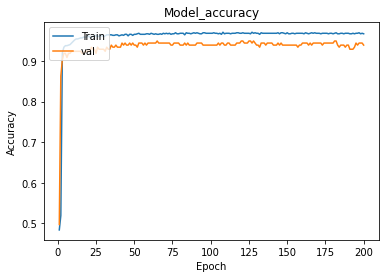

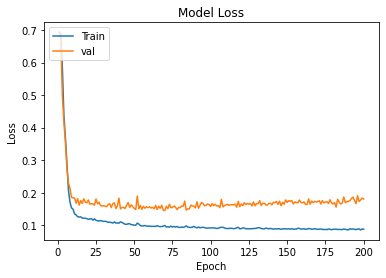

In [78]:
def plot_learningCurve(history, epoch):
    # plot training & validation accuracy values
    epoch_range = range(1, epoch+1)
    plt.plot(epoch_range, history.history['accuracy'])
    plt.plot(epoch_range, history.history['val_accuracy'])
    plt.title('Model_accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train','val'],loc='upper left')
    plt.show()
    
    # Plot traning & validation loss values
    plt.plot(epoch_range, history.history['loss'])
    plt.plot(epoch_range, history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train','val'],loc='upper left')
    plt.show()
plot_learningCurve(history, 200)